####Project Checklist
#Part 1 : Data Analysis
Import necessary libraries

Get the diamond price prediction dataset

Discover and visualize the data to gain insights (Data preprocessing)
    
1. Check for any ZERO value

2. Check for Duplicate rows

3. View and remove outliers 

4. Convert to log scale

5. Convert categorical variables to numerical column using labelencoder

#Part 2 :Model Building

Import ML libraries

Split the data into test and train

Build a pipeline of standard scalar and model for different regressors.

Fit all the models on training data

Get mean of cross-validation on the training set for all the models for 

Pick the model with the best cross-validation score

Fit the best model on the training set and get


#Part 1 : Data Analysis

###Importing the necessary libraries

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Get the diamond price prediction dataset

In [3]:
Diamond  = pd.read_csv('/content/Diamond.csv')
Diamond.drop('Unnamed: 0', axis=1, inplace=True)
Diamond

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
...,...,...,...,...,...,...,...,...,...,...
43035,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
43036,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
43037,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
43038,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74





This is a classic dataset contains the prices and other attributes of almost 54,000 diamonds, but in SHAI competition project we use a subset of the full data which contain only 43040 diamonds.

*   Content price price in US dollars ($326--$18,823)
*   carat weight of the diamond (0.2--5.01)
*   cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   color diamond colour, from J (worst) to D (best)
*   clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*   x length in mm (0--10.74)
*   y width in mm (0--58.9)
*   z depth in mm (0--31.8)
*   depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*   table width of top of diamond relative to widest point (43--95)
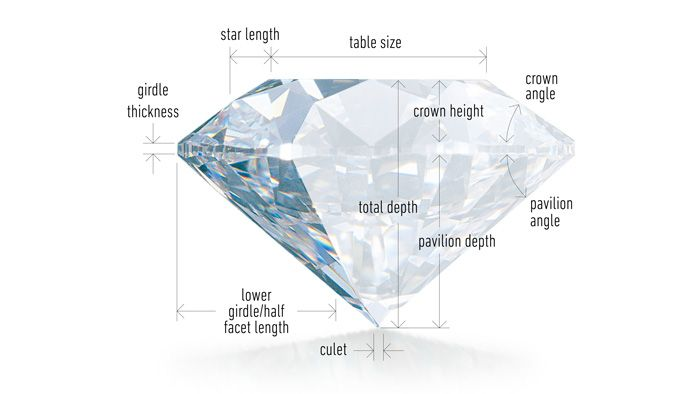











###Discover and visualize the data to gain insights(Data Preprocessing)
1. Check for any ZERO value

2. Check for Duplicate rows

3. View and remove outliers 

4. Convert to log scale

5. Convert categorical variables to numerical column using labelencoder

In [4]:
Diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


####1. Check for any ZERO value

In [5]:
#Check for any ZERO value
Diamond.describe()

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Points to notice:

Min value of "x", "y", "z" are zero this indicates that there are faulty values in data that represents dimensionless or 2-dimensional diamonds. So we need to filter out those as it clearly faulty data points.

In [5]:
len(Diamond[np.logical_or(np.logical_or(Diamond['x'] == 0, Diamond['y'] == 0), Diamond['z'] == 0)])

27

There is 27 row contain dimensionless of our dataset 

In [6]:
#Dropping dimentionless diamonds
Diamond = Diamond.drop(Diamond[Diamond["x"]==0].index)
Diamond = Diamond.drop(Diamond[Diamond["y"]==0].index)
Diamond = Diamond.drop(Diamond[Diamond["z"]==0].index)


Diamond = Diamond.drop(Diamond[Diamond["x"]==''].index)
Diamond = Diamond.drop(Diamond[Diamond["y"]==''].index)
Diamond = Diamond.drop(Diamond[Diamond["z"]==''].index)
Diamond.shape

(43023, 10)


We lost 27 data points by deleting the dimensionless(2-D or 1-D) diamonds

In [7]:
#Check for any Null value
Diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

###2. Check for Duplicate Rows

In [8]:
Diamond[Diamond.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
743,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
744,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
745,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
746,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1547,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
66800,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
66801,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
66802,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
66803,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
Diamond = Diamond.drop_duplicates()
Diamond.shape

(42897, 10)

####2. View and remove outliers 

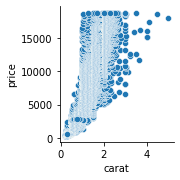

In [8]:
# plot price vs. carat
sns.pairplot(Diamond, x_vars=['carat'], y_vars = ['price'])


The price vs. carat chart show that there are some outliers in the dataset i.e. few diamonds that are really over priced!

In [9]:
#View outliers
def dfboxplot(Diamond, listvar):
 fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
 counter=0
 for ax in axes:
        Diamond.boxplot(column=listvar[counter], ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
 plt.show()



['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

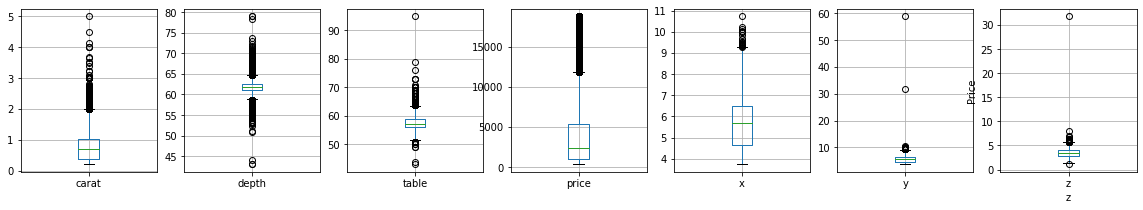

In [10]:
linear_vars = Diamond.select_dtypes(include=[np.number]).columns
display(list(linear_vars))
dfboxplot(Diamond, linear_vars)

In [11]:
for x in ['carat']:
    q75,q25 = np.percentile(Diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Diamond.loc[Diamond[x] < min,x] = np.nan
    Diamond.loc[Diamond[x] > max,x] = np.nan

In [12]:
for x in ['depth']:
    q75,q25 = np.percentile(Diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Diamond.loc[Diamond[x] < min,x] = np.nan
    Diamond.loc[Diamond[x] > max,x] = np.nan

In [13]:
for x in ['table']:
    q75,q25 = np.percentile(Diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Diamond.loc[Diamond[x] < min,x] = np.nan
    Diamond.loc[Diamond[x] > max,x] = np.nan

In [14]:
for x in ['price']:
    q75,q25 = np.percentile(Diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Diamond.loc[Diamond[x] < min,x] = np.nan
    Diamond.loc[Diamond[x] > max,x] = np.nan

In [15]:
for x in ['x']:
    q75,q25 = np.percentile(Diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Diamond.loc[Diamond[x] < min,x] = np.nan
    Diamond.loc[Diamond[x] > max,x] = np.nan

In [16]:
for x in ['y']:
    q75,q25 = np.percentile(Diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Diamond.loc[Diamond[x] < min,x] = np.nan
    Diamond.loc[Diamond[x] > max,x] = np.nan

In [17]:
for x in ['z']:
    q75,q25 = np.percentile(Diamond.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    Diamond.loc[Diamond[x] < min,x] = np.nan
    Diamond.loc[Diamond[x] > max,x] = np.nan

In [18]:
Diamond.isnull().sum()

carat      1654
cut           0
color         0
clarity       0
depth      1996
table       476
price      2903
x            24
y            24
z            29
dtype: int64

In [19]:
Diamond = Diamond.dropna(axis = 0)
Diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

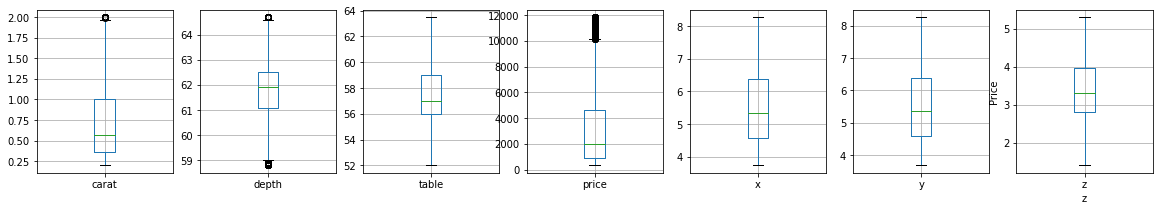

In [20]:
dfboxplot(Diamond, linear_vars)

####Convert to log scale

In [21]:
def histplot(Diamond, listvar):
 fig, axes = plt.subplots(nrows=1, ncols=len(listvar), figsize=(20, 3))
 counter=0
 for ax in axes:
        Diamond.hist(column=listvar[counter], bins=20, ax=axes[counter])
        plt.ylabel('Price')
        plt.xlabel(listvar[counter])
        counter = counter+1
 plt.show()

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

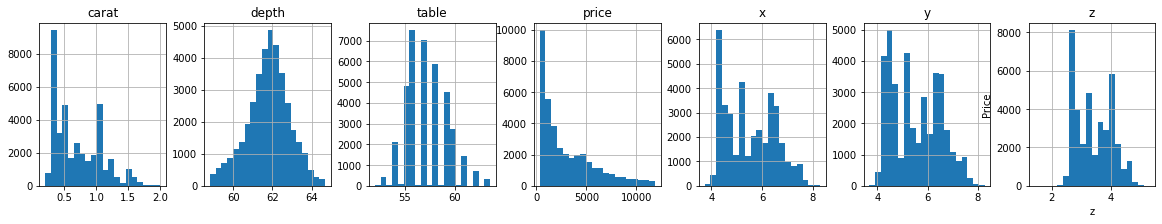

In [22]:
linear_vars = Diamond.select_dtypes(include=[np.number]).columns
display(list(linear_vars))
histplot(Diamond,linear_vars)

In [23]:
def convertfeatures2log(df, listvars):
   for var in listvars:
            Diamond[var] = np.log(df[var])


convertfeatures2log(Diamond,linear_vars)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

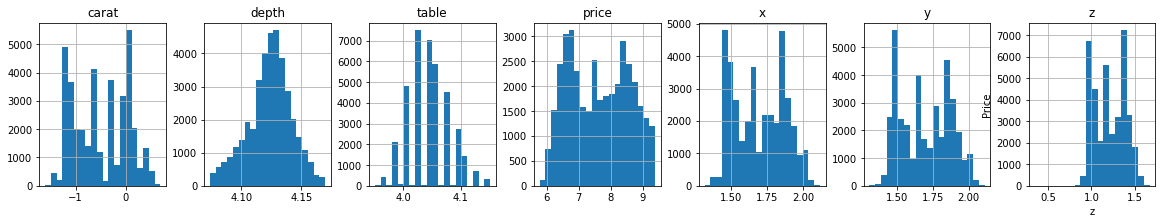

In [24]:
linear_vars = Diamond.select_dtypes(include=[np.number]).columns
display(list(linear_vars))
histplot(Diamond,linear_vars)

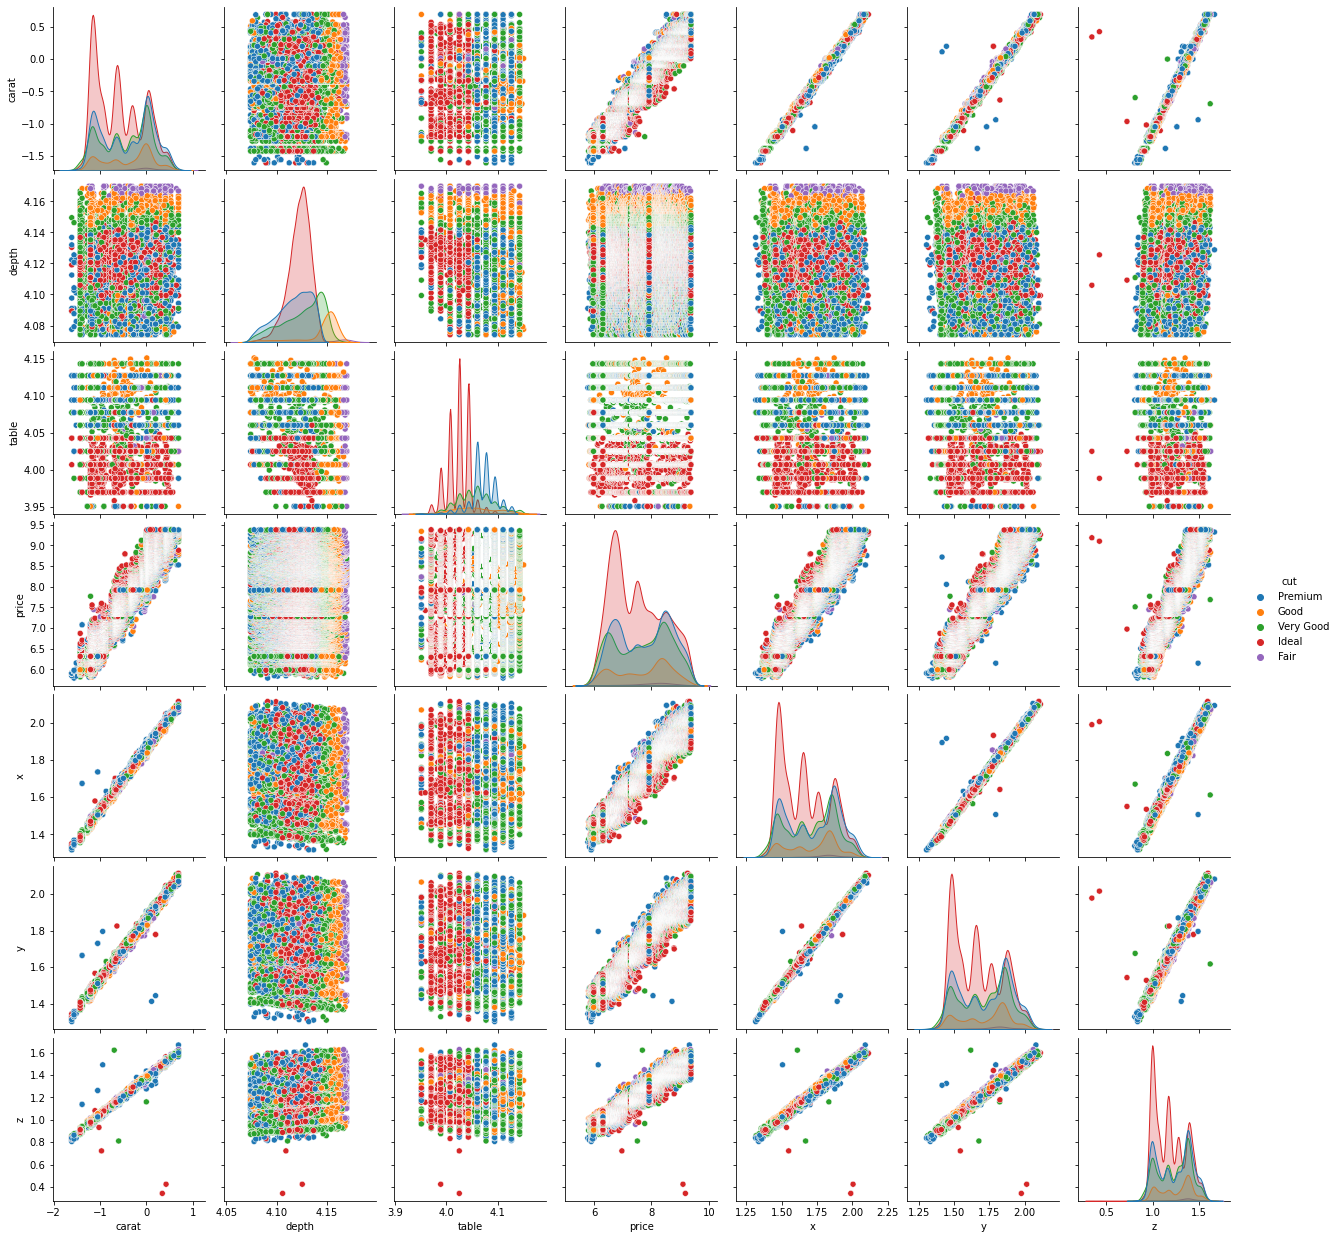

In [25]:
ax=sns.pairplot(Diamond, hue= "cut")

####Convert categorical variable column to numerical column using labelencoder




In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def Encoder(df1):
  # Find the columns of object type along with their column index
    columnsToEncode  = list(df1.select_dtypes(exclude=[np.number]).columns)
    object_cols_ind = []
    for col in columnsToEncode:
        object_cols_ind.append(df1.columns.get_loc(col))
    
    # Encode the categorical columns with numbers 

    for i in object_cols_ind:
        df1.iloc[:,i] = le.fit_transform(df1.iloc[:,i])

In [27]:
Encoder(Diamond)
Diamond.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.560648,3,1,2,4.091006,4.110874,5.786897,1.358409,1.345472,0.837248
1,-1.237874,3,5,5,4.133565,4.060443,5.811141,1.435085,1.442202,0.966984
2,-1.171183,1,6,3,4.147885,4.060443,5.814131,1.467874,1.470176,1.011601


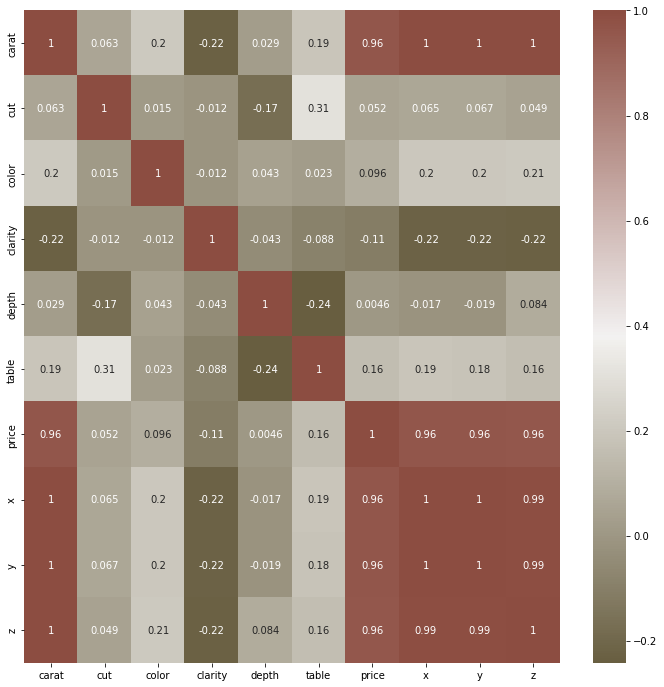

In [28]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= Diamond.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [29]:
### calculation of the correlation coefficient between price and all other fields ###
corr_matrix = Diamond.corr()

print(corr_matrix["price"].sort_values(ascending = False))

price      1.000000
x          0.963162
carat      0.962902
y          0.962628
z          0.959131
table      0.159910
color      0.095612
cut        0.051710
depth      0.004624
clarity   -0.107800
Name: price, dtype: float64


We can see the features carat, x, y and z are closely correlated with price.

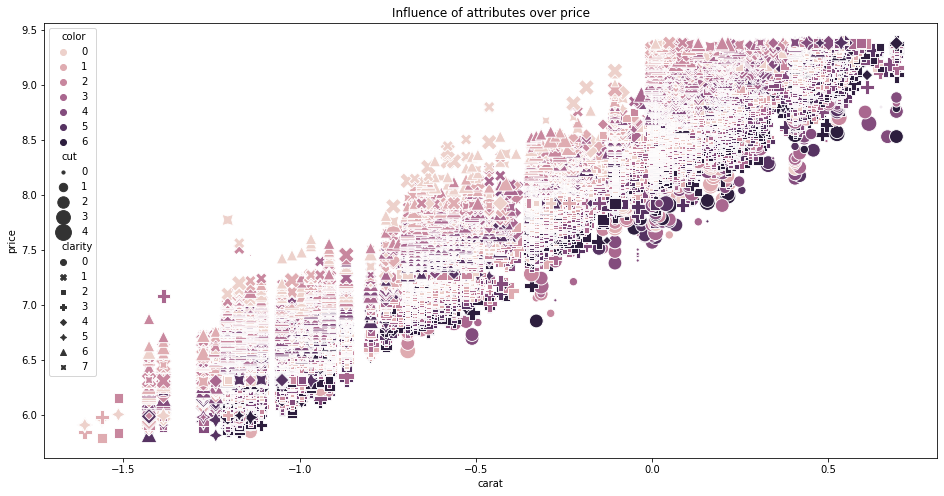

In [30]:
# showing how the feature could infer price
plt.figure(figsize=(16,8))
sns.scatterplot(data=Diamond, x="carat", y="price", hue="color",size="cut", style="clarity", sizes=(10,250))
plt.title("Influence of attributes over price")
plt.show()

#Part 2 :Model Building

Import ML libraries

Split the data into test and train

Build a pipeline of standard scalar and model for different regressors.

Fit all the models on training data

Get mean of cross-validation on the training set for all the models for 

Pick the model with the best cross-validation score

Fit the best model on the training set and get

###Import ML libraries

In [31]:
#import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn. linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.feature_selection import VarianceThreshold # Feature selector
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

###Split the data into test and train

In [46]:
X = Diamond.drop(["price"], axis = 1)
y = Diamond["price"]

scalar = StandardScaler()
X = scalar.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=10)

#print all shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34079, 9)
(3787, 9)
(34079,)
(3787,)


###Build a Machine Learning algorithms pipeline of standard scalar and model for different regressors to predict diamond price.

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
pipeline_lr = Pipeline([("scalar1", StandardScaler()),
                        ('selector', VarianceThreshold()),
                         ("lr", LinearRegression())])

pipeline_lasso = Pipeline([("scalar2", StandardScaler()),
                           ('selector', VarianceThreshold()),
                           ("lasso", Lasso())])

pipeline_dt = Pipeline([("scalar3", StandardScaler()),
                        ('selector', VarianceThreshold()),
                        ("dt", DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar4", StandardScaler()),
                      ('selector', VarianceThreshold()),
                       ("rf", RandomForestRegressor())])

pipeline_kn=Pipeline([("scalar5", StandardScaler()),
                      ('selector', VarianceThreshold()),
                      ("kn", KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar6", StandardScaler()),
                       ('selector', VarianceThreshold()),
                       ("xgb", XGBRegressor())])

pipeline_gbr=Pipeline([("scalar7", StandardScaler()),
                       ('selector', VarianceThreshold()),
                       ("gbr", GradientBoostingRegressor())])


# List of all the pipelines
pipelines = [pipeline_lr, pipeline_lasso, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb, pipeline_gbr]

# Dictionary of pipelines and model types for ease of reference
pipeline_dict = {0: "LinearRegression", 1: "Lasso", 2: "DecisionTree", 3: "RandomForest", 4: "KNeighbors", 5: "XGBRegressor", 6: "GradientBoostingRegressor"}

# Fit the pipelines
for i, model in enumerate(pipelines):
    # fitting our data
    model.fit(X_train, y_train)
    # getting the name of our model
    model_name = pipeline_dict[i]

    print("{} Training Accuracy: {}\n".format(model_name, model.score(X_train, y_train)),
          "{} Testing Accuracy: {}\n".format(model_name, model.score(X_test, y_test)))
    print('----------------------------------------------------------------------------- \n')

    # predictions
    predictions = model.predict(X_test)

LinearRegression Training Accuracy: 0.9521594702431443
 LinearRegression Testing Accuracy: 0.9505351382262665

----------------------------------------------------------------------------- 

Lasso Training Accuracy: 0.0
 Lasso Testing Accuracy: -1.8176553394200212e-05

----------------------------------------------------------------------------- 

DecisionTree Training Accuracy: 0.9999715839297704
 DecisionTree Testing Accuracy: 0.9852661507873997

----------------------------------------------------------------------------- 

RandomForest Training Accuracy: 0.9988076116158644
 RandomForest Testing Accuracy: 0.9920796250484655

----------------------------------------------------------------------------- 

KNeighbors Training Accuracy: 0.9852469540865091
 KNeighbors Testing Accuracy: 0.9780062021360163

----------------------------------------------------------------------------- 

[02:26:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor

These models are overfitted.

Let's use cross validation with 10 folds to validate our models.

###Get mean of cross-validation on the training set for all the models for

In [42]:
# this cell takes approximately 2 mins to run
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, cv=10)
    cv_results_rms.append(cv_score)
    print("{}: {}".format(pipeline_dict[i], cv_score.mean()))

LinearRegression: 0.9520702040362098
Lasso: -0.0007427065862178784
DecisionTree: 0.9838920651868829
RandomForest: 0.9915925990836592
KNeighbors: 0.9768061048184903
[02:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:38:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:li

The best Model after cross validation RandomForest by score 0.9915925990836592

In [43]:
pred = pipeline_rf.predict(X_test)

In [44]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9920796250484655
Adjusted R^2: 0.9920607520342839
MAE: 0.05877902410580197
MSE: 0.0068323458915730065
RMSE: 0.08265800561090865
